#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 11
### Due: Monday, Apr 18th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 18th.

---

## Problem 1


This problem has to do with density estimation and clustering. 

1. Read in `hw11_data.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


### Solution

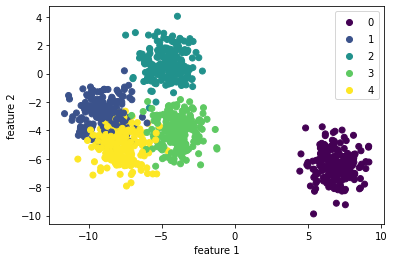

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


#Loading data
data = np.load('hw11_data.npy')
c1 = data[:, 0]
c2 = data[:, 1]
c3 = data[:, 2]


plotting = plt.scatter(c1, c2, c = c3)

plt.xlabel("feature 1")
plt.ylabel("feature 2")

plt.legend(*plotting.legend_elements())

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity


grid = GridSearchCV(KernelDensity(),{'bandwidth': np.linspace(0.1, 1.0, 30)},cv=5)

#Finding best bandwidth for second feature
grid.fit(c1.reshape(-1, 1), c3)


bestbw1 = grid.best_params_['bandwidth']

print("The best bandwidth for first feature is", bestbw1)

#Finding best bandwidth for second feature
grid.fit(c2.reshape(-1, 1), c3)

bestbw2 = grid.best_params_['bandwidth']

print("The best bandwidth for second feature is", bestbw2)


The best bandwidth for first feature is 0.28620689655172415
The best bandwidth for second feature is 0.4724137931034482


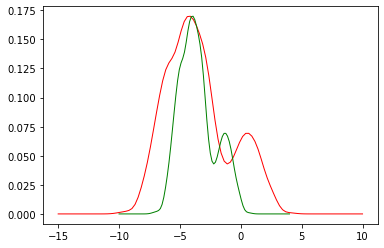

In [3]:
# Plot 2D KDE for each feature separately
a = np.column_stack((np.linspace(-15,10,100), np.linspace(-10, 4, 100)))

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(a[:,0].reshape(-1,1)))


#PLotting for feature 1
fig, ax = plt.subplots()
ax.plot(a[:,0], pdf, linewidth=1, color='red')

#PLotting for feature 2
ax.plot(a[:,1], pdf, linewidth=1, color='green')

Text(0, 0.5, 'Value Density')

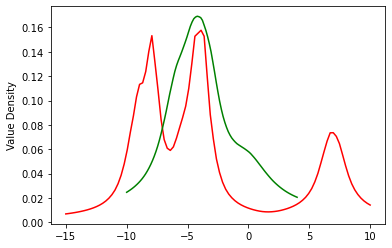

In [4]:
from astroML.density_estimation import KNeighborsDensity

k = [150, 400] 
N = 1000

    
#For first feature
nbrs = KNeighborsDensity('bayesian', n_neighbors=k[0])
nbrs.fit(c1.reshape(-1,1))
dens_nbrs = nbrs.eval(a[:,0].reshape(-1,1)) / N

#For second feature
nbrs1 = KNeighborsDensity('bayesian', n_neighbors=k[1])
nbrs1.fit(c2.reshape(-1,1))
dens_nbrs1 = nbrs1.eval(a[:,1].reshape(-1,1)) / N
    
#Plotting    
plt.plot(a[:,0], dens_nbrs, color='red', label ='Feature 1')
plt.plot(a[:,1], dens_nbrs1, color='green', label ='Feature 2')

plt.ylabel('Value Density')







    


Red line is for Feature 1

Green line is for Feature 2